In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [0]:
with open("/content/drive/My Drive/AI/ModelOutput.2018.Nov.28.13_44_44.batch_param_map.txt") as f:
    count  = 0 
    rows = []
    for line in f:
      if(count == 0 ):
        columns = line.split(",")
      else:
        data = [ (x) for x in line.split(",")[0:5]] + [str(line.split(",")[5][0:-1]).replace('"', '')]
        rows.append(data)
      count += 1

In [0]:
columns = [x.replace('"', '') for x in columns]

In [20]:
print(columns)
print(rows)

['run ', ' randomSeed ', ' prob_LA ', ' END_TIME ', ' prob_UL ', ' AGENT_DEFINITION\n']
[['1 ', ' 123456789 ', ' 3.1E-5 ', ' 1000 ', ' 1.37E-4 ', ' random:100'], ['2 ', ' 123456789 ', ' 3.1E-5 ', ' 1000 ', ' 1.37E-4 ', ' random:75']]


In [0]:
mapFrame = pd.DataFrame(data = rows, columns = columns)

In [0]:
with open("/content/drive/My Drive/AI/ModelOutput.2018.Nov.28.13_44_44.txt") as f:
    count  = 0 
    rows = []
    for line in f:
      if(count == 0 ):
        columns = line.split(",")
      else:
        #print(line.split(","))
        data = [ float(x) for x in line.split(",")[0:7]]
        data = [int(x) for x in data]
        rows.append(data)
      count += 1

columns = [str(x).replace('"', '') for x in columns]


In [0]:
dataFrame = pd.DataFrame(data = rows, columns = columns)

In [0]:
dataFrame["day"] = [x//1440 for x in dataFrame[" tick "]]

In [25]:
mapFrame

,run,randomSeed,prob_LA,END_TIME,prob_UL,AGENT_DEFINITION
0,1,123456789,3.1E-5,1000,1.37E-4,random:100
1,2,123456789,3.1E-5,1000,1.37E-4,random:75


In [0]:
totalNumberBatches = max([int(x) for x in list(mapFrame['run '])])

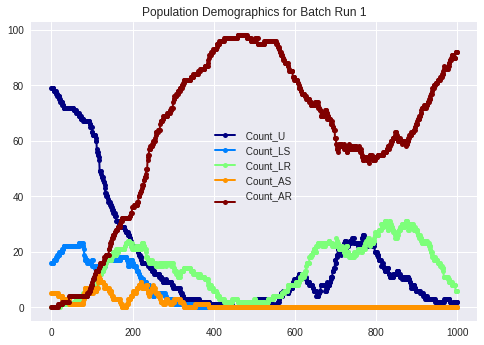

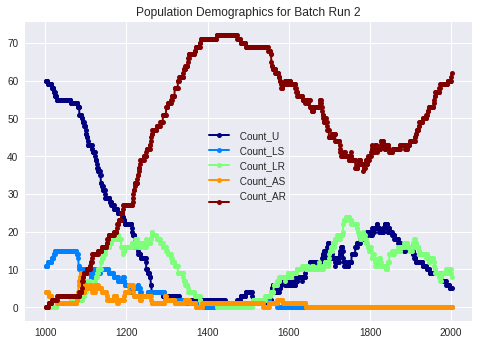

In [27]:


for batchRun in range(1,totalNumberBatches + 1):
  dataFrameBatch = dataFrame[dataFrame['run '] == batchRun]
  ax = dataFrameBatch[[' Count_U ',' Count_LS ',' Count_LR ',' Count_AS ',' Count_AR\n']].plot(lw=2, colormap='jet', marker='.', markersize=10, title='Population Demographics for Batch Run ' + str(batchRun))
  